In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [229]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import*

In [17]:
HeartData=pd.read_csv(r'C:\Users\supri\Downloads\dataset (2).csv')

In [19]:
HeartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
HeartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
missing_data= HeartData.isnull().sum()
total_percentage = (missing_data.sum()/HeartData.shape[0]) * 100
print(f'Total percentage of missing data is {round(total_percentage, 2)}%')
duplicate= HeartData[HeartData.duplicated()]
print("Duplicate rows:")
duplicate
#drop duplicate rows
HeartData=HeartData.drop_duplicates()

Total percentage of missing data is 0.0%
Duplicate rows:


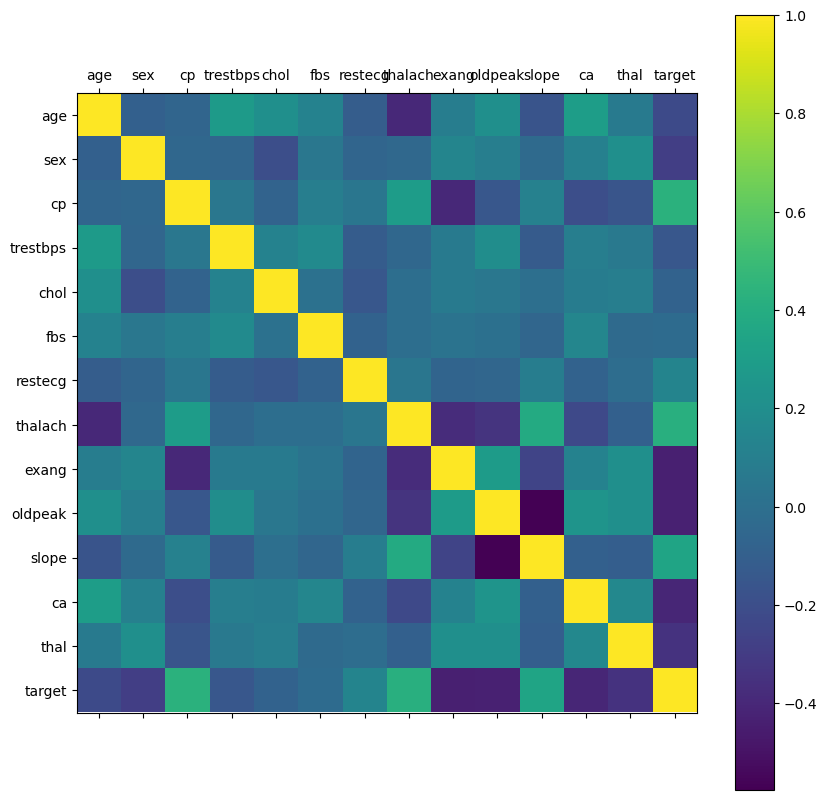

In [44]:
rcParams['figure.figsize'] = 10,10 
plt.matshow(HeartData.corr()) 
plt.yticks(np.arange(HeartData.shape[1]), HeartData.columns) 
plt.xticks(np.arange(HeartData.shape[1]), HeartData.columns)
plt.colorbar()

In [64]:
corr = HeartData.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [78]:
X = HeartData.drop(['target'], axis = 1)
Y=HeartData['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

print("XTrain->", X_train.shape[0], "XTest->", X_test.shape[0], "YTrain->",Y_train.shape[0], "YTest->",Y_test.shape[0])

XTrain-> 211 XTest-> 91 YTrain-> 211 YTest-> 91


In [82]:
knn_scores = []
for k in range(2,21):
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(X_train.values, Y_train.values)
  knn_score=round(knn_classifier.score(X_test.values, Y_test.values),2)
  knn_scores.append(knn_score)
    
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, Y_train)
knn_score=knn_classifier.predict(X_test)
print(classification_report(Y_test,knn_score))

              precision    recall  f1-score   support

           0       0.61      0.49      0.54        45
           1       0.58      0.70      0.63        46

    accuracy                           0.59        91
   macro avg       0.60      0.59      0.59        91
weighted avg       0.60      0.59      0.59        91



Text(0.5, 1.0, 'KNN Scores for different K neighbouras')

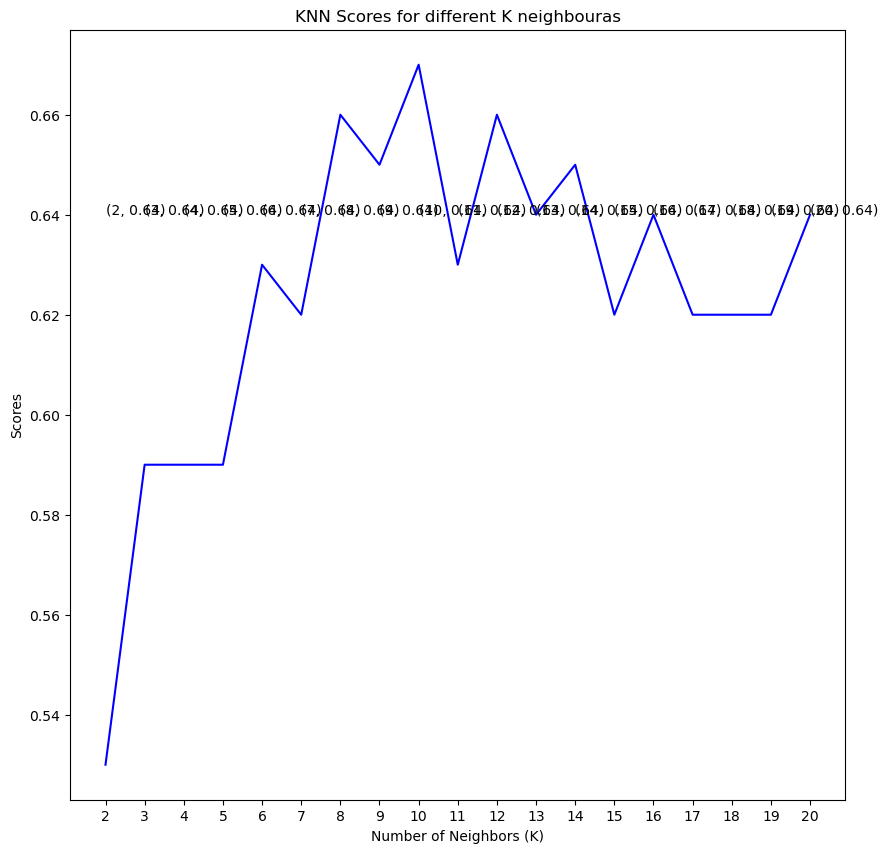

In [110]:
import matplotlib.pyplot as plt 
plt.plot([k for k in range(2, 21)], knn_scores, color='blue') 
for i in range(2,21):
  plt.text(i, knn_scores [i-2], (i, knn_scores[i-2]))
plt.xticks([i for i in range(2, 21)])
plt.xlabel('Number of Neighbors (K )')
plt.ylabel('Scores')
plt.title('KNN Scores for different K neighbouras')

In [121]:
from sklearn.metrics import accuracy_score

svc_scores = [] 
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
   svc_classifier = SVC(kernel = kernels[1])
   svc_classifier.fit(X_train.values, Y_train.values)
   svc_scores.append(round (svc_classifier.score(X_test.values, Y_test.values),2))
    
svc_classifier = SVC(kernel=kernels[0])
svc_classifier.fit(X_train.values, Y_train.values)
svc_prediction_result=svc_classifier.predict(X_test.values)
#print(svc_prediction_result)
print(accuracy_score(Y_test.values, svc_prediction_result))

0.8241758241758241


Text(0.5, 1.0, 'SVM scores Activation function wise...')

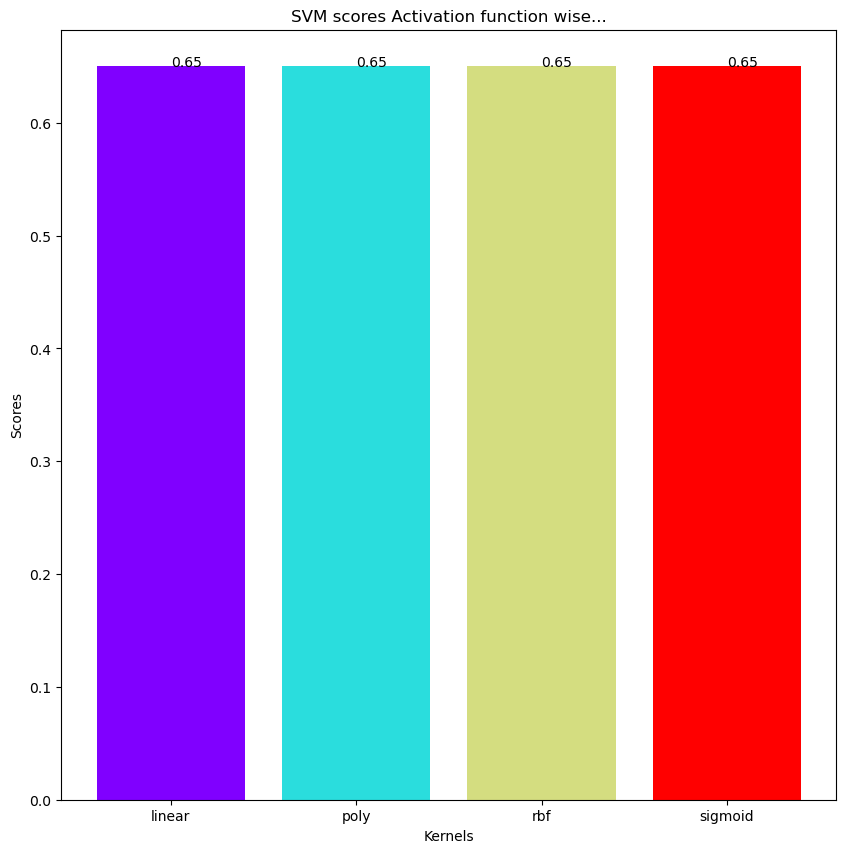

In [143]:
colors = rainbow(np.linspace(0, 1, len(kernels))) 
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('SVM scores Activation function wise...')

In [149]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
  dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
  dt_classifier.fit(X_train.values, Y_train.values)
  dt_scores.append(round(dt_classifier.score(X_test.values, Y_test.values),2))
print("Done")

Done


In [151]:
print(dt_scores)

[0.67, 0.7, 0.79, 0.78, 0.79, 0.76, 0.76, 0.84, 0.73, 0.77, 0.76, 0.73, 0.74]


In [161]:
 dt_classifier = DecisionTreeClassifier(max_features = 13, random_state = 0)
 dt_classifier.fit(X_train.values, Y_train.values)

DecisionTreeClassifier(max_features=13, random_state=0)

Text(0.5, 1.0, 'Decision Tree Classifier scores for different counter of masinus features')

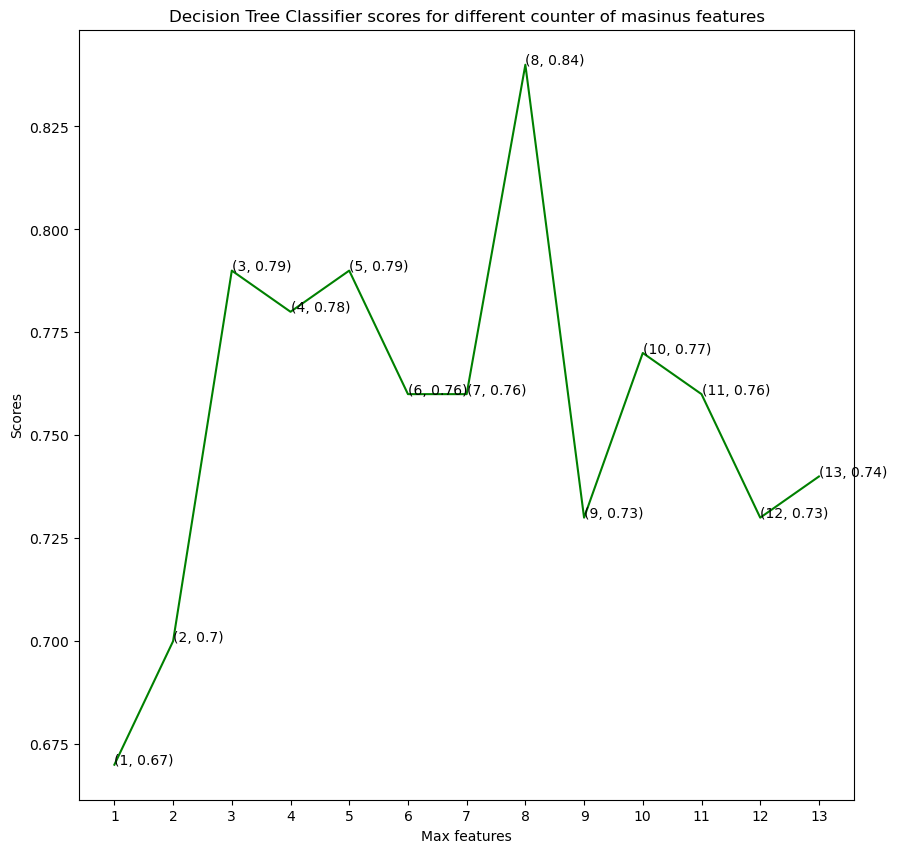

In [188]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color= 'green') 
for i in range(1, len(X.columns)+1):
   plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features') 
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different counter of masinus features')

In [194]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators= [10, 20, 100, 200, 500]
for i in estimators:
  rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
  rf_classifier.fit(X_train.values, Y_train.values)
  rf_scores.append(round(rf_classifier.score(X_test.values, Y_test.values),2))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

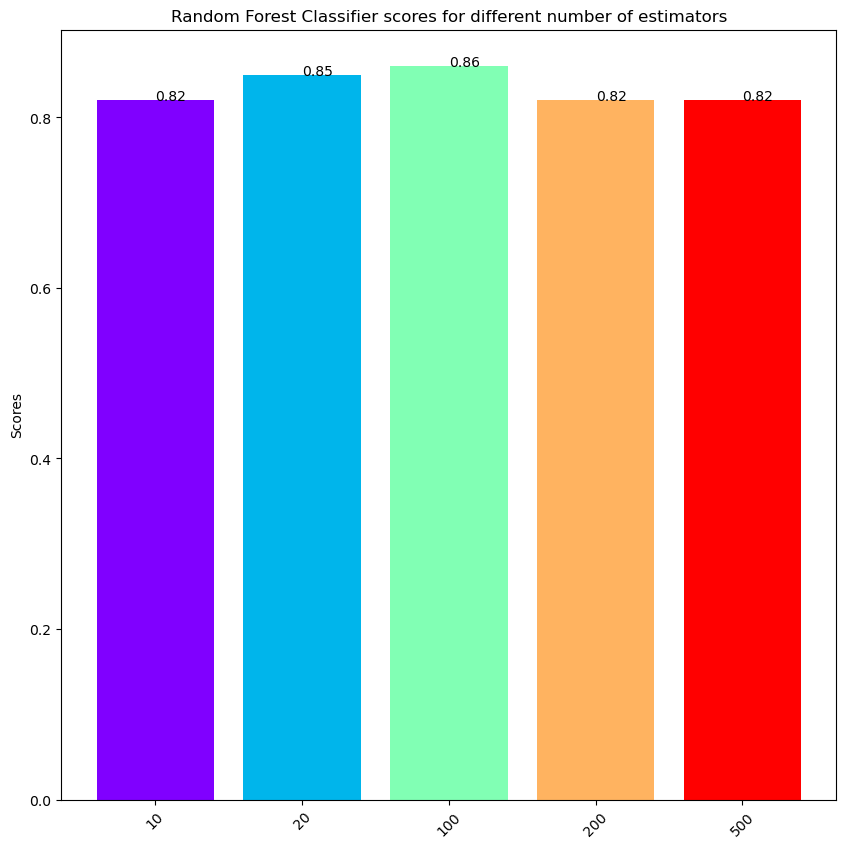

In [217]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width= 0.8)
for i in range(len(estimators)):
   plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks=range(len(estimators)), labels=[str(estimator) for estimator in estimators], rotation=45)
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [238]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train.values, Y_train.values) 
logistic_model_prediction = logistic_model.predict(X_test.values)
print(accuracy_score(Y_test.values, logistic_model_prediction))
print(classification_report(Y_test.values, logistic_model_prediction))

0.8131868131868132
              precision    recall  f1-score   support

           0       0.87      0.73      0.80        45
           1       0.77      0.89      0.83        46

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

